# Part One: Context

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Load the data
df = pd.read_csv('MentalHealthSurvey.csv')
print(df.shape)
df.head()

(1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


The data selected is a Mental Health Survey of (mostly) tech employees across the world. The data has the following variables: 

In [2]:
print(df.columns.values)

['Timestamp' 'Age' 'Gender' 'Country' 'state' 'self_employed'
 'family_history' 'treatment' 'work_interfere' 'no_employees' 'remote_work'
 'tech_company' 'benefits' 'care_options' 'wellness_program' 'seek_help'
 'anonymity' 'leave' 'mental_health_consequence' 'phys_health_consequence'
 'coworkers' 'supervisor' 'mental_health_interview' 'phys_health_interview'
 'mental_vs_physical' 'obs_consequence' 'comments']


The purpose of this report is to explore the qualities that are predictive in whether or not an individual will seek mental health treatment. Mental health is an exceptionally important aspect of life, and it's something not discussed enough. Understanding the relationships between an individual and their workplace can be beneficial in fostering healhier, more fulfilling lives, and on the business end, more productive employees. 

# Part Two: Exploratory Data Analysis

We will break this down into two parts: Cleaning the data, and visualizing the cleaned data. Part of cleaning the data requires some visualization, so there may be overlap, and some of the data may be changed after generating insights from the graphs, but for clarity we will try and keep the two parts separate. 

Step 1: Data Cleanup

Step 2: Data Visualization 

## Step 1. Data Cleanup

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
np.sum(df.isnull())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

It's apparent that we have a fair amount of missing data to deal with. Let's take variables one by one to make sure they're in proper shape. 

### 1.1 - Age

In [5]:
# Determine if there are any unsual ages 
print(min(df.Age))
print(max(df.Age))
print(df.Age[df.Age<=0].values)
print(df.Age[df.Age<18].values)

# Fix the -29
df.loc[143,'Age'] = 29

# Remove rows with the odd ages 
df = df.loc[-df.Age.isin([-1, -1726, 5, 8, 11, 329, 99999999999]), :]

-1726
99999999999
[  -29 -1726    -1]
[  -29 -1726     5     8    11    -1]


We'll confirm now that the age looks proper: 

In [6]:
print(np.sort(df.Age.unique()))

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
 43 44 45 46 47 48 49 50 51 53 54 55 56 57 58 60 61 62 65 72]


### 1.2  - Gender

Gender is very messy, and not coded properly at all. We will code for three genders: Male, Female, Trans. 

In [7]:
df.Gender.replace(to_replace=["M", "male", "m", "Male-ish", "maile", "Mal", "Male (CIS)", "Make", 
                              "Male ", "Man","msle", "Mail", "Malr","Cis Man", "Cis Male", "cis male"], 
                 value='Male', 
                 inplace = True)
df.Gender.replace(to_replace = ["Trans-female", "something kinda male?", "queer/she/they", 
                                "non-binary","Nah", "all", "Enby", "fluid", "Genderqueer", 
                                "Androgyne", "Agender", "male leaning androgynous", "Guy (-ish) ^_^", 
                                "Trans woman", "Neuter", "Female (trans)", "queer", 
                                "ostensibly male, unsure what that really means"], 
                 value = 'Trans', 
                 inplace = True)
df.Gender.replace(to_replace=["Cis Female", "F", 'f', 'woman', "female", "Woman",  "Femake", "Female ",
                              "cis-female/femme", "Female (cis)", "femail"], 
                 value = 'Female', 
                 inplace = True)
df.Gender.unique()

array(['Female', 'Male', 'Trans'], dtype=object)

### 1.3 - Country
    
There are a lot of classes. We'll need to recode sparse classes. 

In [8]:
df.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina', 'Hungary',
       'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway', 'Thailand',
       'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

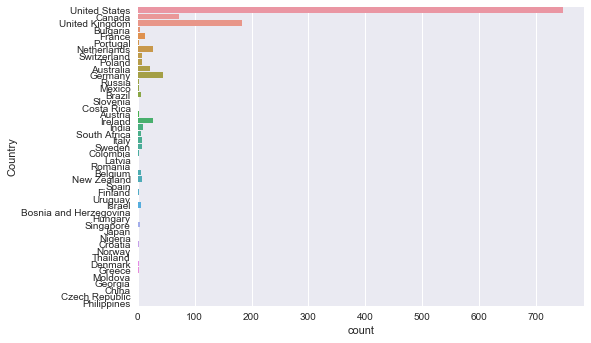

In [9]:
sns.countplot(y=df.Country)
plt.show()

We'll make four categories - United States, United Kingdom, Canada, Other

In [10]:
df.Country.replace(to_replace = ['Germany','Mexico','Australia','New Zealand','Czech Republic','Denmark', 
                                 'Greece', 'Moldova','Croatia', 'Norway','Bosnia and Herzegovina','Finland',
                                 'Spain','Latvia', 'Romania', 'Belgium','Italy', 'Sweden','Austria', 'Ireland', 
                                 'Bulgaria', 'France','Portugal', 'Netherlands', 'Switzerland', 'Poland',
                                 'Georgia','Philippines','China','Thailand','Hungary', 'Singapore', 'Japan',
                                 'India','Israel','Costa Rica','Brazil','Colombia','South Africa','Nigeria'],
                  value = 'Other',
                  inplace = True)
df.Country.replace(to_replace=['Russia', 'Slovenia','Uruguay','Georgia'], value = 'Other', inplace = True)

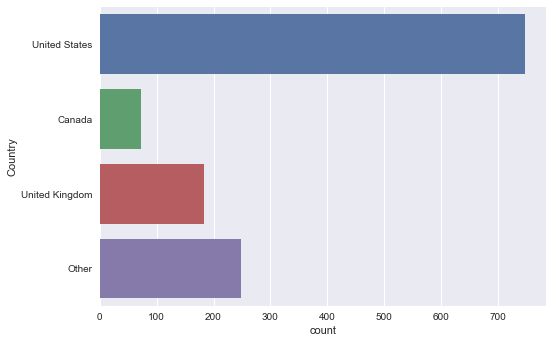

In [11]:
sns.countplot(y=df.Country)
plt.show()

Canada appears pretty sparse, but we'll leave it - the important distinction here is that Canada has distinctly different health care than many of the nations in "Other", and the US. 

Truthfully, the best way to recode these variables would be by grouping different nations into categories based on their healthcare systems, but that would be quite tedious. We'll settle for what we have, here. 

## 1.4 - Date

We'll extract the hour of the response. This could potentially be useful for cross-validation. 

In [12]:
df.Timestamp = pd.to_datetime(df.Timestamp,infer_datetime_format=True)
df['Hour'] = df.Timestamp.dt.hour
print(np.sort(df.Hour.unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


## 1.5 - Comments

We'll recode commments - 1 for a comment left, 0 for no comment left. Those who leave a comment are more likely to feel passionate about mental health, or have a story to tell about their own mental health struggles. This may mean they are also more inclined to seek treatment, which could be a helpful predictor. 

In [13]:
df.loc[df.comments.notnull(), 'comments'] = 1
df.loc[df.comments.isnull(), 'comments'] = 0
df.comments.unique()

array([0, 1], dtype=object)

## 1.6 - Work Interfere

This is a variable about whether or not an individual belives their mental health interferes with their work. 

There are a lot of missing values, so it would be helpful to know how their responses are distributed. 

In [14]:
print(df.work_interfere.unique())
print(df.work_interfere.value_counts())

['Often' 'Rarely' 'Never' 'Sometimes' nan]
Sometimes    464
Never        212
Rarely       173
Often        140
Name: work_interfere, dtype: int64


Some people declined to answer. This could either be because they believe it does significantly interfere with their work, and are afraid to answer as such, or it doesn't effect them very much at all so they didn't care to answer. 
    
The responder had an opportunity to answer either way. Based on the fact that these responders took the entire survey, we're not inclined to believe that they didn't care to answer this one question because their mental health doesn't interfere with work. 
    
Therefore, we are going to impute the missing values with "Often." This will drastically increase the amount of "Oftens."

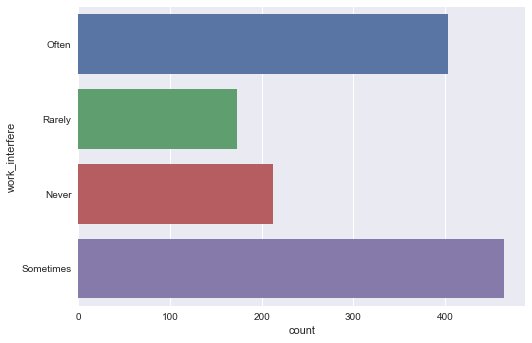

In [15]:
df.loc[df.work_interfere.isnull(), 'work_interfere'] = 'Often'
sns.countplot(y=df.work_interfere)
plt.show()

## 1.7 - Self-Employed Status
As noted above, there are 18 values that are missing for self-employed. Perhaps information from the other variables can give us insight as to whether or not they are self-employed. 

In [16]:
df.loc[df.self_employed.isnull(), :]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Hour
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,0,11
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,0,11
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,0,11
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,0,11
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,0,11
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,No,No,Yes,Yes,No,Maybe,Don't know,No,0,11
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Maybe,Maybe,Some of them,No,No,No,Don't know,No,0,11
7,2014-08-27 11:32:05,39,Male,Canada,NaN,NaN,No,No,Never,1-5,...,No,No,No,No,No,No,No,No,0,11
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Maybe,No,Yes,Yes,No,Maybe,No,No,0,11
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,No,No,Yes,Yes,Maybe,Maybe,Yes,No,0,11


We'll make an assumption here that more than 6 employees means they're not self-employed. Of course, it's possible that these individuals are the employers, but we'll maintain the assumption. 

It so happens that the majority of these observations can talk to some of their supervisors about their mental health, so that verifies they are not self-employed as well. 

In [17]:
df.loc[(df.self_employed.isnull()) & (df.no_employees!='1-5'), 'self_employed'] = 'No'

Now we'll say that anyone with 1-5 employees in their company who can talk to their coworkers about their mental health is not self-employed, because that indicates they have coworkers to begin with, and thus are not self-employed (since we're maintaining the assumption above.

We'll indicate the remaining observations as self-employed. 

In [18]:
df.loc[(df.self_employed.isnull()) & (df.coworkers !='No') , 'self_employed'] = 'No'
df.loc[(df.self_employed.isnull()) & (df.coworkers =='No') , 'self_employed'] = 'Yes'

In [19]:
np.sum(df.self_employed.isnull())

0

The above code confirms that we've dealt with the NA values in this column. 

## 1.8 - State

We will drop this column. There are far too many missing values due to the fact that not everyone who took this survey lives in the United States, so it serves no purpose. This means we will have 27 columns. 

In [20]:
df.drop('state', axis = 'columns', inplace=True)
print(df.shape)

(1252, 27)


## 1.9 - Remaining Variables

We no longer have NA values to deal with. All that's left is to check the unique values of every other variable to confirm that there are no unusual classes. 

In [21]:
# Confirm no other missing values
np.sum(df.isnull())

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
Hour                         0
dtype: int64

In [22]:
relevant_columns = df.columns.values
for i in ['Timestamp', 'Age', 'Gender', 'Country', 'self_employed', 'work_interfere', 'Hour', 'comments']:
    relevant_columns = relevant_columns[relevant_columns!=i]
print(relevant_columns)

['family_history' 'treatment' 'no_employees' 'remote_work' 'tech_company'
 'benefits' 'care_options' 'wellness_program' 'seek_help' 'anonymity'
 'leave' 'mental_health_consequence' 'phys_health_consequence' 'coworkers'
 'supervisor' 'mental_health_interview' 'phys_health_interview'
 'mental_vs_physical' 'obs_consequence']


In [23]:
for column in relevant_columns:
    print(df[column].unique())

['No' 'Yes']
['Yes' 'No']
['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
['No' 'Yes']
['Yes' 'No']
['Yes' "Don't know" 'No']
['Not sure' 'No' 'Yes']
['No' "Don't know" 'Yes']
['Yes' "Don't know" 'No']
['Yes' "Don't know" 'No']
['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
['No' 'Maybe' 'Yes']
['No' 'Yes' 'Maybe']
['Some of them' 'No' 'Yes']
['Yes' 'No' 'Some of them']
['No' 'Yes' 'Maybe']
['Maybe' 'No' 'Yes']
['Yes' "Don't know" 'No']
['No' 'Yes']


Everything looks clean. It's time to conduct some visualizations to see if we can draw any additional insights. 

# Step 2. Data Visualization

## Age

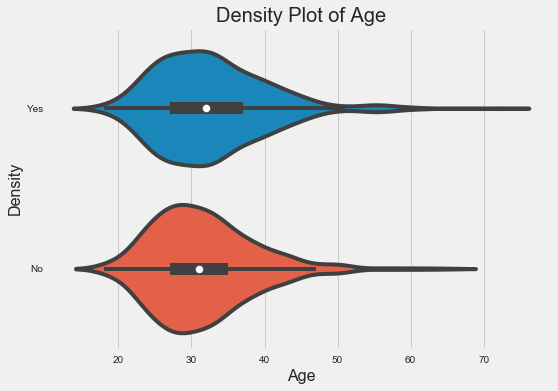

In [24]:
style.use('fivethirtyeight')
sns.violinplot(x = 'Age', y = 'treatment', data = df)
plt.title('Density Plot of Age', fontsize = 20)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('Age', fontsize = 16)
plt.show()


They appear to have similar distributions. 